Jupyter notebook version of [physionet-challenge-2019 Example](https://github.com/physionetchallenges/physionet-challenge-2019) on GitHub, file `get_sepsis_score.py` with a few additions.

See [Early Prediction of Sepsis from Clinical Data: the PhysioNet/Computing in Cardiology Challenge 2019](https://physionet.org/challenge/2019/).

# PhysioNet Challenge 2019 Example

# 1 Setup

In [1]:
import sys
import numpy  as np    

# 2 Functions

Copied without any changes from `get_sepsis_score.py`.

## 2.1 get_sepsis_score 

In [2]:
def get_sepsis_score(values, column_names):
    x_mean = np.array([
        83.8996, 97.0520,  36.8055,  126.2240, 86.2907,
        66.2070, 18.7280,  33.7373,  -3.1923,  22.5352,
        0.4597,  7.3889,   39.5049,  96.8883,  103.4265,
        22.4952, 87.5214,  7.7210,   106.1982, 1.5961,
        0.6943,  131.5327, 2.0262,   2.0509,   3.5130,
        4.0541,  1.3423,   5.2734,   32.1134,  10.5383,
        38.9974, 10.5585,  286.5404, 198.6777])
    x_std = np.array([
        17.6494, 3.0163,  0.6895,   24.2988, 16.6459,
        14.0771, 4.7035,  11.0158,  3.7845,  3.1567,
        6.2684,  0.0710,  9.1087,   3.3971,  430.3638,
        19.0690, 81.7152, 2.3992,   4.9761,  2.0648,
        1.9926,  45.4816, 1.6008,   0.3793,  1.3092,
        0.5844,  2.5511,  20.4142,  6.4362,  2.2302,
        29.8928, 7.0606,  137.3886, 96.8997])
    c_mean = np.array([60.8711, 0.5435, 0.0615, 0.0727, -59.6769, 28.4551])
    c_std = np.array([16.1887, 0.4981, 0.7968, 0.8029, 160.8846, 29.5367])

    x = values[:, 0:34]
    c = values[:, 34:40]
    x_norm = np.nan_to_num((x - x_mean) / x_std)
    c_norm = np.nan_to_num((c - c_mean) / c_std)

    beta = np.array([
        0.1806,  0.0249, 0.2120,  -0.0495, 0.0084,
        -0.0980, 0.0774, -0.0350, -0.0948, 0.1169,
        0.7476,  0.0323, 0.0305,  -0.0251, 0.0330,
        0.1424,  0.0324, -0.1450, -0.0594, 0.0085,
        -0.0501, 0.0265, 0.0794,  -0.0107, 0.0225,
        0.0040,  0.0799, -0.0287, 0.0531,  -0.0728,
        0.0243,  0.1017, 0.0662,  -0.0074, 0.0281,
        0.0078,  0.0593, -0.2046, -0.0167, 0.1239])
    rho = 7.8521
    nu = 1.0389

    xstar = np.concatenate((x_norm, c_norm), axis=1)
    exp_bx = np.exp(np.matmul(xstar, beta))
    l_exp_bx = pow(4 / rho, nu) * exp_bx

    scores = 1 - np.exp(-l_exp_bx)
    labels = (scores > 0.45)
    return (scores, labels)    

## 2.2 read_challenge_data

In [3]:
def read_challenge_data(input_file):
    with open(input_file, 'r') as f:
        header = f.readline().strip()
        column_names = header.split('|')
        values = np.loadtxt(f, delimiter='|')
    # ignore SepsisLabel column if present
    if column_names[-1] == 'SepsisLabel':
        column_names = column_names[:-1]
        values = values[:, :-1]
    return (values, column_names)      

# 3 Process file

## 3.1 Specify directory where to find the training .psv files

In [4]:
DATADIR = "C:/Users/efg/Desktop/Physionet-2019/data/training/"

## 3.2 Specify .psv file to process

In [5]:
FILENAME = "p00001.psv"

## 3.3 Read .psv input file

"psv" = "pipe-separated values"

In [6]:
record_name = FILENAME
if record_name.endswith('.psv'):
    record_name = record_name[:-4]    

In [7]:
input_file = DATADIR + record_name + '.psv'
(values, column_names) = read_challenge_data(input_file)  

In [8]:
values.shape

(24, 40)

### Display file as table

[Note:  Final Sepsis column has been removed if present in input file.]

In [9]:
import pandas as pd
patientFile = pd.DataFrame(values, columns = column_names)
patientFile

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,1.0
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,2.0
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,3.0
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,4.0
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,5.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,6.0
6,91.5,97.0,36.5,104.0,75.0,60.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,7.0
7,94.0,95.0,NaN,114.0,85.0,66.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,8.0
8,94.0,95.0,NaN,121.0,88.0,69.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,9.0
9,102.0,95.0,NaN,117.0,89.0,70.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.0,1.0,1.0,0.0,-214.64,10.0


## 3.4 Missingness

Adapted from [Visualizing the patterns of missing value occurrence with Python](https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj).

### 3.4.1 Method 1:  seaborn.heatmap

In [10]:
import seaborn as sns

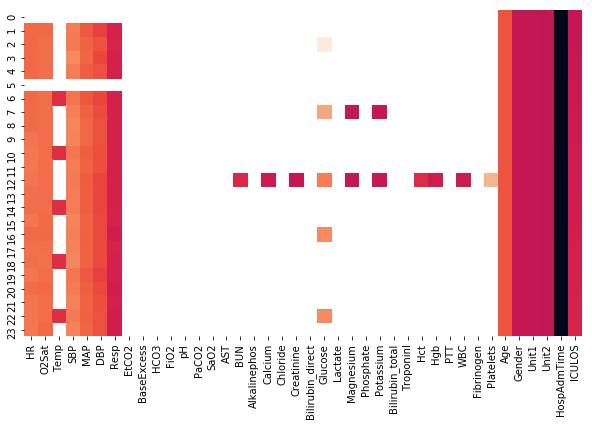

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

sns.heatmap(patientFile, cbar = False)

### Method 2:  missingno module

If needed:

```
conda install -c conda-forge missingno
```

In [12]:
import missingno as msno

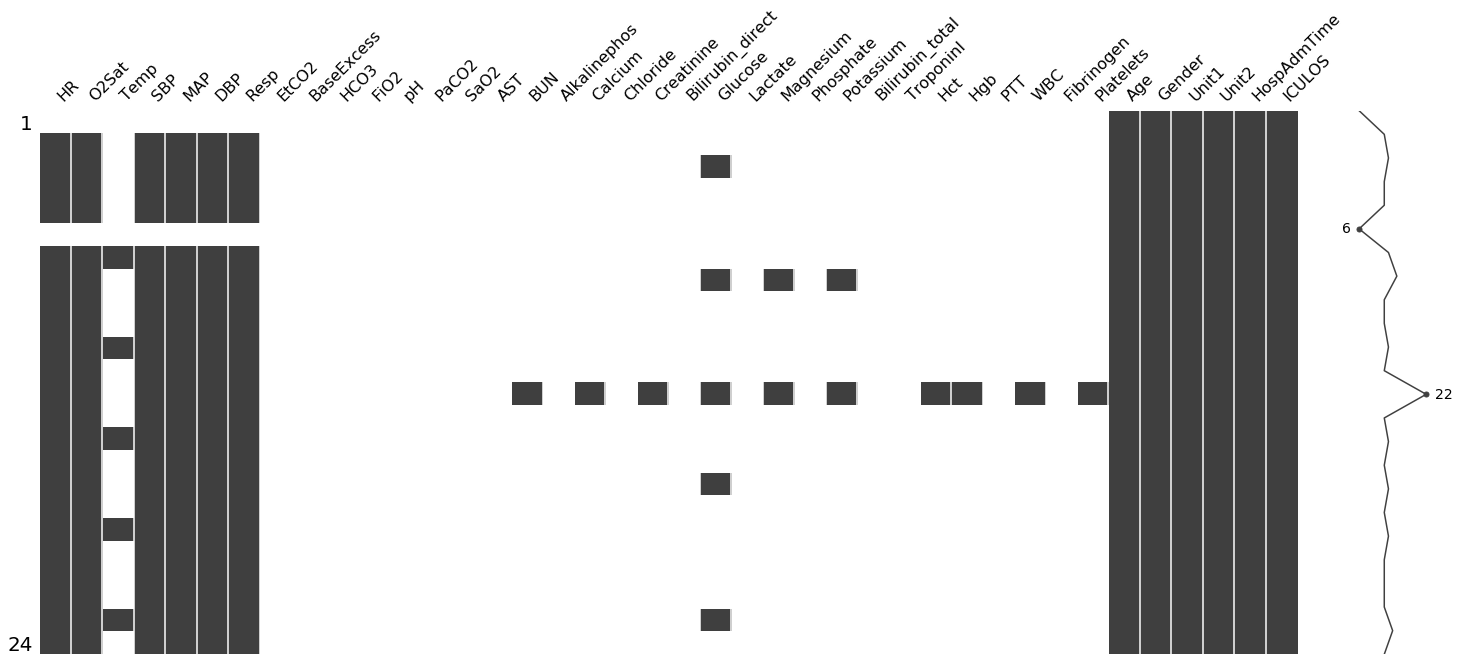

In [13]:
msno.matrix(patientFile)

## 3.5 Generate predictions

In [14]:
(scores, labels) = get_sepsis_score(values, column_names) 

### Display predictions

Note:  Multiply boolean `labels` by 1 to convert to 0/1 integers

In [15]:
pd.DataFrame({'Scores': scores, 
              'Labels': 1*labels})

,Scores,Labels
0,0.396483,0
1,0.464493,1
2,0.462290,1
3,0.458360,1
4,0.433429,0
5,0.402908,0
6,0.431638,0
7,0.450950,1
8,0.438304,0
9,0.467245,1


### Write predictions to .out file

For now, write to current directory

In [16]:
output_file = record_name + '.out'
with open(output_file, 'w') as f:
    for (s, l) in zip(scores, labels):
        f.write('%g|%d\n' % (s, l))     

Verify file exists

In [17]:
import os.path
os.path.isfile(output_file)

True

*efg* | 2019-03-17